# Exploracion inicial de datos

In [1]:
## importamos librerias necesarias para el analisis

import pandas as pd

In [131]:
data1 = pd.read_csv('Datasets\AccesosaInternetfijoportecnologiaylocalidad_2791751688510955351.csv')

In [132]:
data1.dtypes

Provincia         object
Partido           object
Localidad         object
Link Indec        object
ADSL              object
CABLEMODEM        object
DIAL UP           object
FIBRA OPTICA      object
OTROS             object
SATELITAL         object
WIMAX             object
WIRELESS          object
Total general     object
Unnamed: 13      float64
dtype: object

In [120]:
data1['Provincia'] = data1['Provincia'].astype(str)
data1['Partido'] = data1['Partido'].astype(str)
data1['Localidad'] = data1['Localidad'].astype(str)

In [5]:
def limpiar_valor(valor):
    if valor == '- 0':
        return 0
    else:
        try:
            return int(valor)
        except ValueError:
            return 0

In [6]:
data1['ADSL'] = data1['ADSL'].str.replace('.', '')
data1['CABLEMODEM'] = data1['CABLEMODEM'].str.replace('.', '')
data1['DIAL UP'] = data1['DIAL UP'].str.replace('.', '')
data1['FIBRA OPTICA'] = data1['FIBRA OPTICA'].str.replace('.', '')
data1['OTROS'] = data1['DIAL UP'].str.replace('.', '')
data1['SATELITAL'] = data1['OTROS'].str.replace('.', '')
data1['WIMAX'] = data1['WIMAX'].str.replace('.', '')
data1['WIRELESS'] = data1['WIRELESS'].str.replace('.', '')
data1['Total general'] = data1['Total general'].str.replace('.', '')

C:\Users\felix\AppData\Local\Temp\ipykernel_25088\2314559424.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['ADSL'] = data1['ADSL'].str.replace('.', '')
C:\Users\felix\AppData\Local\Temp\ipykernel_25088\2314559424.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['CABLEMODEM'] = data1['CABLEMODEM'].str.replace('.', '')
C:\Users\felix\AppData\Local\Temp\ipykernel_25088\2314559424.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['DIAL UP'] = data1['DIAL UP'].str.replace('.', '')
C:\Users\felix\A

In [7]:
columnas_numericas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
data1[columnas_numericas] = data1[columnas_numericas].applymap(limpiar_valor)

In [8]:
data1.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,0,0,664,7218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,0,0,0,0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,0,0,0,327,1282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6,NaN


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   int64  
 5   CABLEMODEM     3142 non-null   int64  
 6   DIAL UP        3142 non-null   int64  
 7   FIBRA OPTICA   3142 non-null   int64  
 8   OTROS          3142 non-null   int64  
 9   SATELITAL      3142 non-null   int64  
 10  WIMAX          3142 non-null   int64  
 11  WIRELESS       3142 non-null   int64  
 12  Total general  3142 non-null   int64  
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), int64(9), object(4)
memory usage: 343.8+ KB


In [10]:
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1 = data1.drop(['Link Indec'], axis=1)

In [11]:
data1.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,873,4704,0,2,0,0,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,181,0,0,0,0,0,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,782,0,6,0,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6,6


In [12]:
provincia_seleccionada = 'BUENOS AIRES'  # Nombre de la provincia que deseas filtrar

# Obtener la tabla de conteo para la tecnología 'CABLEMODEM' en la provincia seleccionada
tabla_cablemodem = data1[data1['Provincia'] == provincia_seleccionada]['CABLEMODEM'].mean()

print(tabla_cablemodem)

3838.4427374301677


In [13]:
data1['CABLEMODEM'].value_counts()

0        2295
1          35
3           9
10          6
65          5
         ... 
1847        1
2578        1
1510        1
13644       1
66          1
Name: CABLEMODEM, Length: 693, dtype: int64

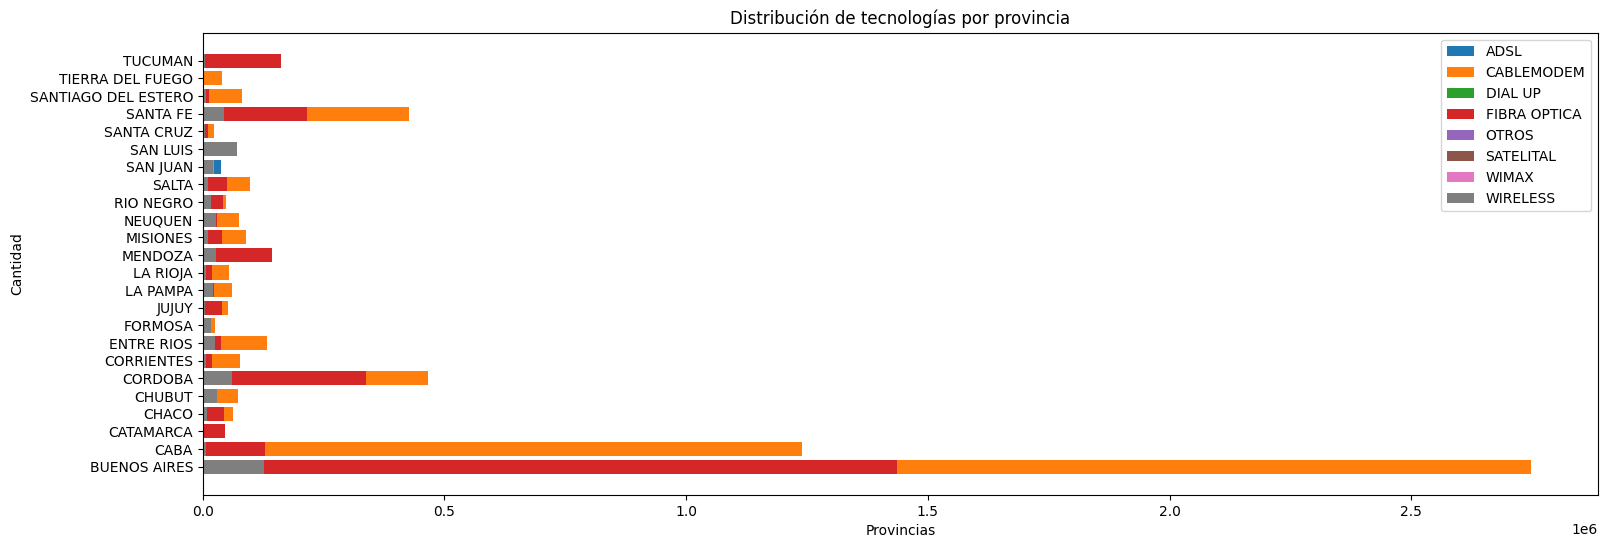

In [14]:
import matplotlib.pyplot as plt

# Agrupar los datos por provincia y calcular el recuento de cada tecnología
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
provincias = data1['Provincia'].unique()

# Crear una lista vacía para almacenar las alturas de las barras para cada tecnología
alturas_barras = []

# Calcular las alturas de las barras para cada tecnología y provincia
for tecnologia in tecnologias:
    alturas = [data1[data1['Provincia'] == provincia][tecnologia].sum() for provincia in provincias]
    alturas_barras.append(alturas)

# Crear el gráfico de barras

fig, ax = plt.subplots(figsize=(18, 6))
for i, tecnologia in enumerate(tecnologias):
    ax.barh(provincias, alturas_barras[i], label=tecnologia)

# Configurar los ejes y la leyenda
ax.set_xlabel('Provincias')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de tecnologías por provincia')
ax.legend()

# Mostrar el gráfico
plt.show()

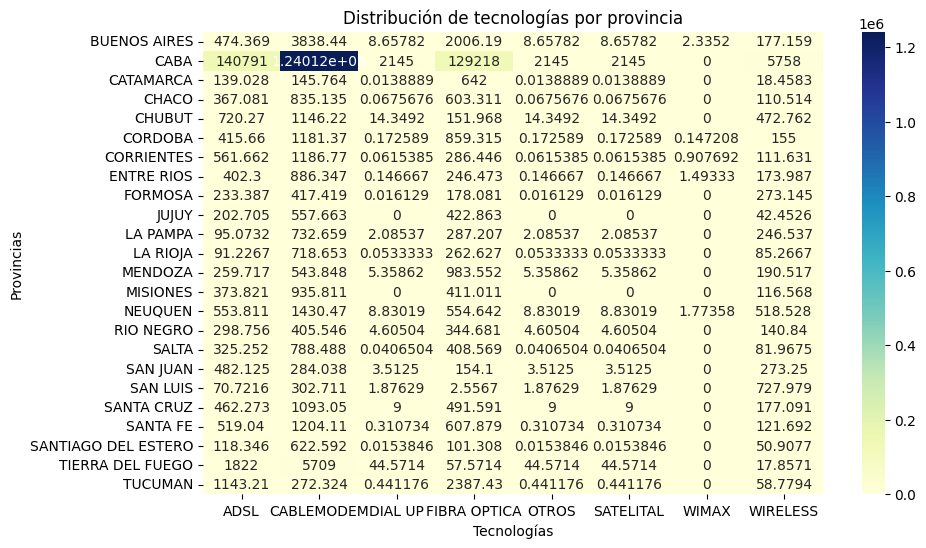

In [15]:
import seaborn as sns

# Crear una tabla pivotante de las tecnologías por provincia
tabla_pivot = data1.pivot_table(index='Provincia', values=tecnologias)

# Crear el gráfico de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivot, cmap='YlGnBu', annot=True, fmt='g')

# Configurar los ejes y la leyenda
plt.xlabel('Tecnologías')
plt.ylabel('Provincias')
plt.title('Distribución de tecnologías por provincia')

# Mostrar el gráfico
plt.show()


In [6]:
data2 = pd.read_csv('C:\PI_DA\Datasets\AccesosaInternetfijoporvelocidadbajadayprovincia_2791741688510744394.csv')

In [7]:
data2.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [9]:
data3 = pd.read_csv('Datasets\AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171688510920141.csv')

In [10]:
data3.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data4 = pd.read_csv('C:\PI_DA\Datasets\ConectividadalserviciodeInternet_2776151689180728669.csv')

In [29]:
import geopandas as gpd
from shapely.geometry import Point

In [30]:
data4.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [31]:
def clean_coordinate(value):
    value = value.replace(',', '.')  # Reemplazar ',' por '.'
    value = value.replace('..', '.')  # Reemplazar '..' por '.'
    return float(value)

In [32]:
# Limpiar las columnas 'Longitud' y 'Latitud'
data4['Longitud'] = data4['Longitud'].apply(clean_coordinate)
data4['Latitud'] = data4['Latitud'].apply(clean_coordinate)

In [33]:
data4['geometry'] = data4.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)


In [34]:
data4.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,geometry
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,-38.647261,-62.320022,POINT (-62.3200223419024 -38.6472605094596)
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,-38.776507,-62.185183,POINT (-62.1851833537179 -38.7765069529222)
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,-37.848278,-58.255167,POINT (-58.2551665841248 -37.8482779294345)
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,-37.941206,-58.322592,POINT (-58.3225920150442 -37.9412057603)
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,-37.625498,-58.746186,POINT (-58.7461862359423 -37.6254980210026)


<Axes: >

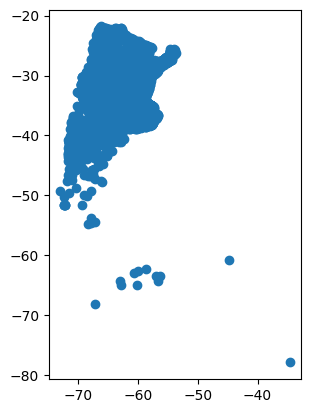

In [35]:
# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(data4, geometry='geometry')

# Graficar el mapa de Argentina
gdf.plot()


<Axes: >

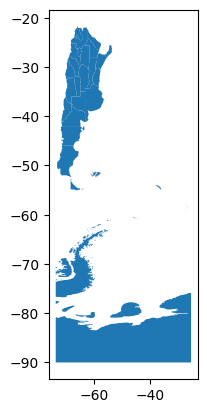

In [38]:
import geopandas as gpd

# Cargar los datos de los polígonos de Argentina desde un archivo GeoJSON
archivo_geojson = 'C:\PI_DA\Datasets\provincias\provincias.shp'
gdf_argentina = gpd.read_file(archivo_geojson)

# Graficar el mapa de Argentina con polígonos
gdf_argentina.plot()

In [39]:
import requests

# URL del archivo GeoJSON
url = 'https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.15/download/localidades.geojson'

# Realizar la solicitud GET al servidor para descargar el archivo
response = requests.get(url)

# Verificar si la descarga fue exitosa (código de respuesta 200)
if response.status_code == 200:
    # Guardar el contenido descargado en un archivo local
    with open('archivo.geojson', 'wb') as file:
        file.write(response.content)
    print('Descarga completa.')
else:
    print('Error al descargar el archivo.')

Descarga completa.


<Axes: >

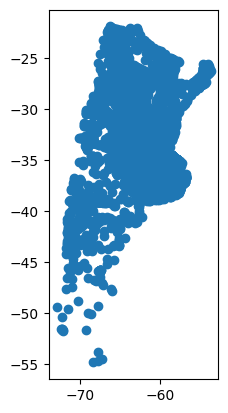

In [43]:
import geopandas as gpd

# Cargar los datos de los polígonos de Argentina desde un archivo GeoJSON
archivo_geojson = 'archivo.geojson'
gdf_argentina = gpd.read_file(archivo_geojson)

# Graficar el mapa de Argentina con polígonos
gdf_argentina.plot()

<Axes: >

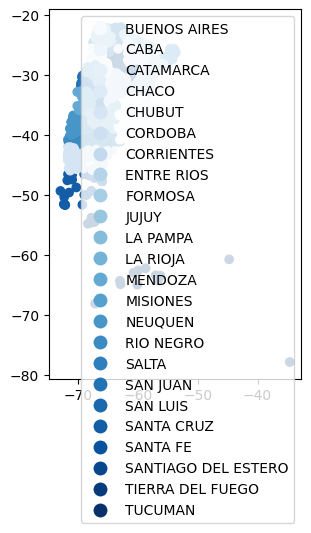

In [37]:
import geopandas as gpd

# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(data4, geometry='geometry')

# Crear un gráfico coroplético
gdf.plot(column='Provincia', cmap='Blues', legend=True)

In [32]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   float64
 15  Longitud       4312 non-null   float64
 16  geometry       4312 non-null   object 
dtypes: float64(3), int64(1), object(13)
memory usage: 57

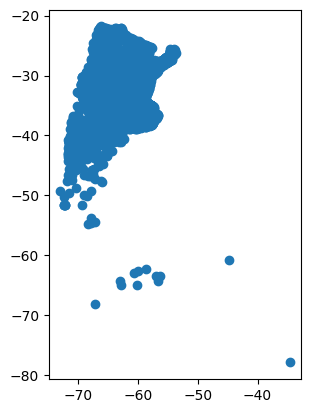

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un objeto GeoDataFrame a partir del DataFrame existente
gdf = gpd.GeoDataFrame(data4)

# Visualizar el mapa
gdf.plot()

# Mostrar el mapa
plt.show()


In [19]:
data5 = pd.read_csv('C:\PI_DA\Datasets\historico_velocidad_internet_x_prov.csv')

In [20]:
data5.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [21]:
data6 = pd.read_csv('C:\PI_DA\Datasets\historico_velocidad_internet.csv')

In [22]:
data6.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [2]:
data7 = pd.read_csv('C:\PI_DA\Datasets\Internet_Accesos-por-tecnologia_x_prov.csv')

In [3]:
data7.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [4]:
data7.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032
840,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data7 = data7.drop(840)

In [14]:
data7.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
835,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


In [8]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    object 
 1   Trimestre     840 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.2+ KB


In [15]:
data7['Otros'] = data7['Otros'].astype(str)
data7['Wireless'] = data7['Wireless'].astype(str)

In [16]:
data7['ADSL'] = data7['ADSL'].str.replace('.', '')
data7['Cablemodem'] = data7['Cablemodem'].str.replace('.', '')
data7['Fibra óptica'] = data7['Fibra óptica'].str.replace('.', '')
data7['Wireless'] = data7['Wireless'].str.replace('.', '')
data7['Otros'] = data7['Otros'].str.replace('.', '')
data7['Total'] = data7['Total'].str.replace('.', '')


C:\Users\felix\AppData\Local\Temp\ipykernel_20440\1011854664.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data7['ADSL'] = data7['ADSL'].str.replace('.', '')
C:\Users\felix\AppData\Local\Temp\ipykernel_20440\1011854664.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data7['Cablemodem'] = data7['Cablemodem'].str.replace('.', '')
C:\Users\felix\AppData\Local\Temp\ipykernel_20440\1011854664.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data7['Fibra óptica'] = data7['Fibra óptica'].str.replace('.', '')
C:\Use

In [17]:
data7.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [18]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


In [21]:
# Filtrar valores que contienen el carácter especial "*"
mask = data7['Año'].str.contains('\*', regex=True)

# Mostrar las filas que cumplen con la condición
rows_with_special_character = data7[mask]

In [22]:
rows_with_special_character

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


In [19]:
def remove_special_character(df, column_name):
    df[column_name] = df[column_name].str.replace('*', '')
    return df

# Uso de la función
data7 = remove_special_character(data7, 'Año')

C:\Users\felix\AppData\Local\Temp\ipykernel_20440\3824996615.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].str.replace('*', '')


In [20]:
data7 = remove_special_character(data7, 'Trimestre')

C:\Users\felix\AppData\Local\Temp\ipykernel_20440\3824996615.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].str.replace('*', '')


In [44]:
data7['Año'].dtypes

dtype('O')

In [54]:
data7[data7['Año'] == 2022]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


In [23]:
data7['Año'] = pd.to_numeric(data7['Año'])
data7['Trimestre'] = pd.Categorical(data7['Trimestre'])
data7['Provincia'] = data7['Provincia'].astype(str)
data7['ADSL'] = data7['ADSL'].astype(int)
data7['Cablemodem'] = data7['Cablemodem'].astype(int)
data7['Fibra óptica'] = data7['Fibra óptica'].astype(int)
data7['Wireless'] = data7['Wireless'].astype(int)
data7['Otros'] = data7['Otros'].astype(int)
data7['Total'] = data7['Total'].astype(int)


In [ ]:
data7['Trimestre'] = pd.Categorical(data7['Trimestre'])

In [26]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           840 non-null    int64   
 1   Trimestre     840 non-null    category
 2   Provincia     840 non-null    object  
 3   ADSL          840 non-null    int32   
 4   Cablemodem    840 non-null    int32   
 5   Fibra óptica  840 non-null    int32   
 6   Wireless      840 non-null    int32   
 7   Otros         840 non-null    int32   
 8   Total         840 non-null    int32   
dtypes: category(1), int32(6), int64(1), object(1)
memory usage: 34.1+ KB


In [35]:
# Eliminar espacios en blanco de los valores en la columna 'Trimestre'
data7['Trimestre'] = data7['Trimestre'].str.strip()

In [36]:
trimestres = data7['Trimestre'].unique()
trimestres

array(['3', '2', '1', '4'], dtype=object)

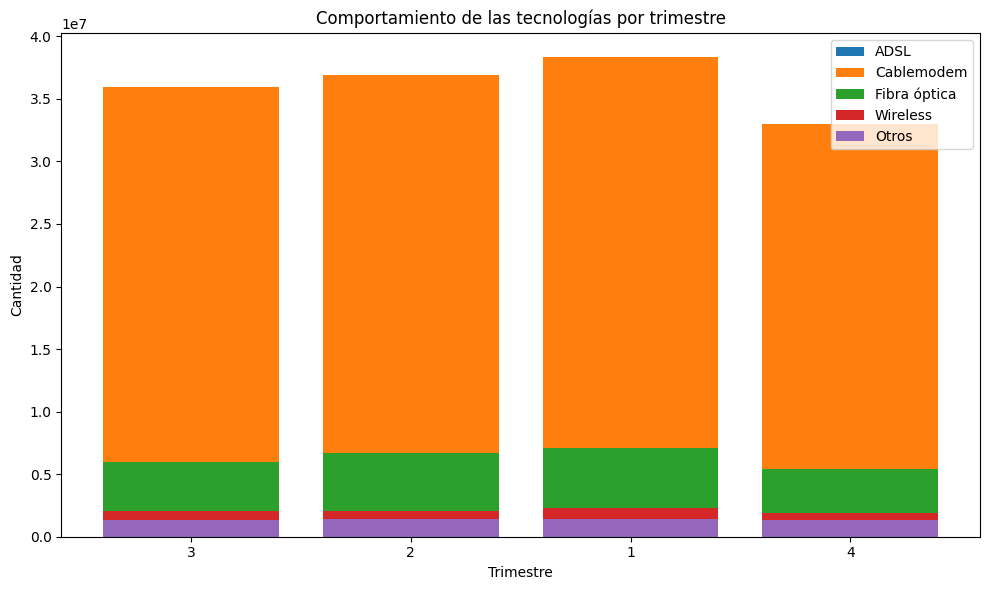

In [37]:
import matplotlib.pyplot as plt


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los datos de las tecnologías para cada trimestre
adsl = data7.groupby('Trimestre')['ADSL'].sum()
cablemodem = data7.groupby('Trimestre')['Cablemodem'].sum()
fibra_optica = data7.groupby('Trimestre')['Fibra óptica'].sum()
wireless = data7.groupby('Trimestre')['Wireless'].sum()
otros = data7.groupby('Trimestre')['Otros'].sum()

# Graficar las tecnologías en función de los trimestres
ax.bar(trimestres, adsl, label='ADSL')
ax.bar(trimestres, cablemodem, label='Cablemodem')
ax.bar(trimestres, fibra_optica, label='Fibra óptica')
ax.bar(trimestres, wireless, label='Wireless')
ax.bar(trimestres, otros, label='Otros')

# Personalizar el gráfico
ax.set_xlabel('Trimestre')
ax.set_ylabel('Cantidad')
ax.set_title('Comportamiento de las tecnologías por trimestre')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[-5000000.        0.  5000000. 10000000. 15000000. 20000000. 25000000.]


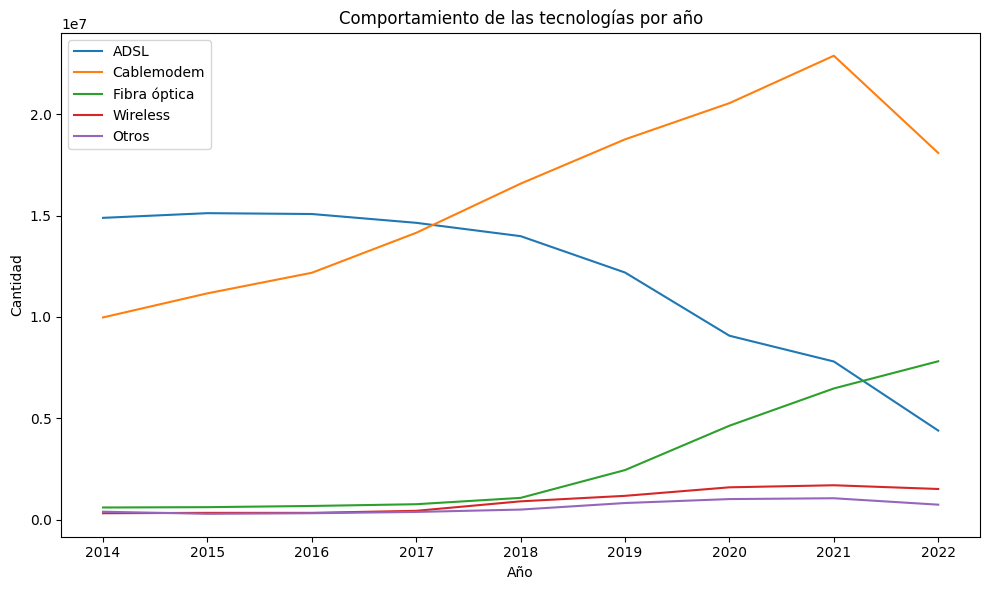

In [40]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los datos de las tecnologías por año
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for tecnologia in tecnologias:
    datos_tecnologia = data7.groupby('Año')[tecnologia].sum()
    ax.plot(datos_tecnologia.index, datos_tecnologia, label=tecnologia)

# Personalizar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Comportamiento de las tecnologías por año')
ax.legend()

# Mostrar los valores del eje x
yticks = ax.get_yticks()
print(yticks)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [5]:
data8 = pd.read_csv('C:\PI_DA\Datasets\Internet_Accesos-por-tecnologia.csv')

In [6]:
data8.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [7]:
data8.tail()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
30,2015,1,3.756.153,2.668.248,168.188,79.098,66.045,6.737.732,Ene-Mar 2015
31,2014,4,3.764.038,2.536.219,149.682,76.984,71.573,6.598.496,Oct-Dic 2014
32,2014,3,3.714.764,2.569.868,155.494,85.096,70.049,6.595.271,Jul-Sept 2014
33,2014,2,3.708.882,2.461.670,149.363,72.405,72.148,6.464.468,Abr-Jun 2014
34,2014,1,3.697.066,2.407.330,150.323,70.749,72.930,6.398.398,Ene-Mar 2014


In [8]:
data8['Año'] = pd.to_numeric(data8['Año'], errors='coerce')

In [12]:
data8[data8['Año']==2019]

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
11,2019,4,2.414.575,4.883.869,941.295,340.144,213.298,8.793.181,Oct-Dic 2019
12,2019,3,2.909.805,4.800.091,852.221,338.241,264.326,9.164.684,Jul-Sept 2019
13,2019,2,2.990.457,4.635.575,760.794,308.027,265.328,8.960.181,Abr-Jun 2019
14,2019,1,3.132.789,4.435.439,637.099,276.419,166.389,8.648.135,Ene-Mar 2019


In [51]:
#data8['ADSL'] = data8['ADSL'].str.replace('.', '')
#data8['Cablemodem'] = data8['Cablemodem'].str.replace('.', '')
#data8['Fibra óptica'] = data8['Fibra óptica'].str.replace('.', '')
#data8['Wireless'] = data8['Wireless'].astype(str)
#data8['Wireless'] = data8['Wireless'].str.replace('.', '')
data8['Otros'] = data8['Otros'].astype(str)
data8['Otros'] = data8['Otros'].str.replace('.', '')
data8['Total'] = data8['Total'].str.replace('.', '')

C:\Users\felix\AppData\Local\Temp\ipykernel_20440\1274406080.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data8['Otros'] = data8['Otros'].str.replace('.', '')
C:\Users\felix\AppData\Local\Temp\ipykernel_20440\1274406080.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data8['Total'] = data8['Total'].str.replace('.', '')


In [69]:
data8['ADSL'] = data8['ADSL'].astype(int)
data8['Cablemodem'] = data8['Cablemodem'].astype(int)
data8['Fibra óptica'] = data8['Fibra óptica'].astype(int)
data8['Wireless'] = data8['Wireless'].astype(int)
data8['Otros'] = data8['Otros'].astype(int)
data8['Total'] = data8['Total'].astype(int)

In [70]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int32 
 3   Cablemodem    35 non-null     int32 
 4   Fibra óptica  35 non-null     int32 
 5   Wireless      35 non-null     int32 
 6   Otros         35 non-null     int32 
 7   Total         35 non-null     int32 
 8   Periodo       35 non-null     object
dtypes: int32(6), int64(2), object(1)
memory usage: 1.8+ KB


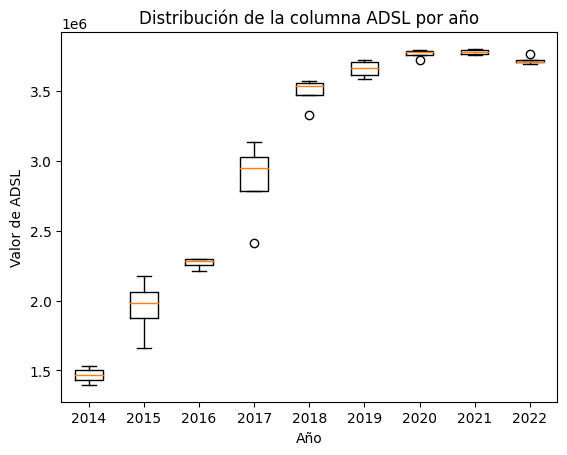

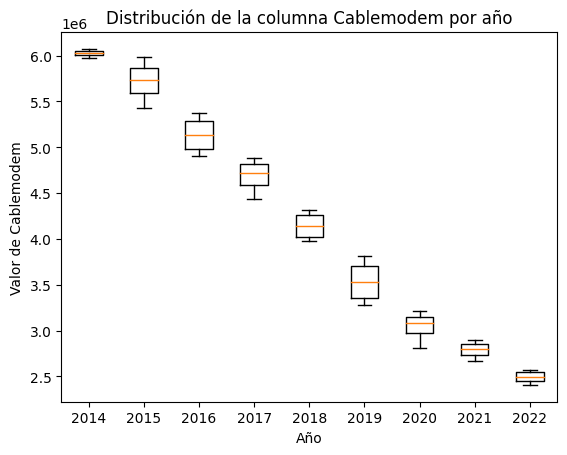

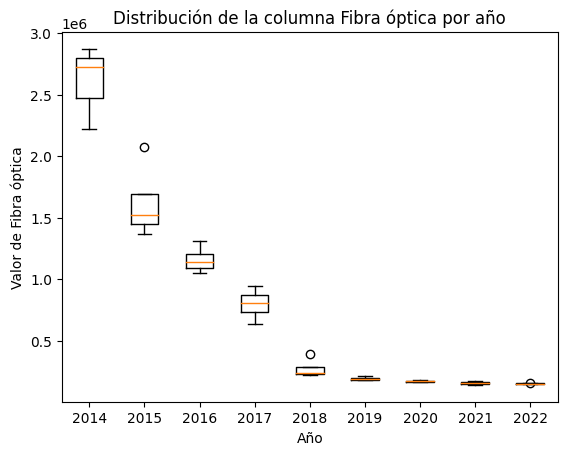

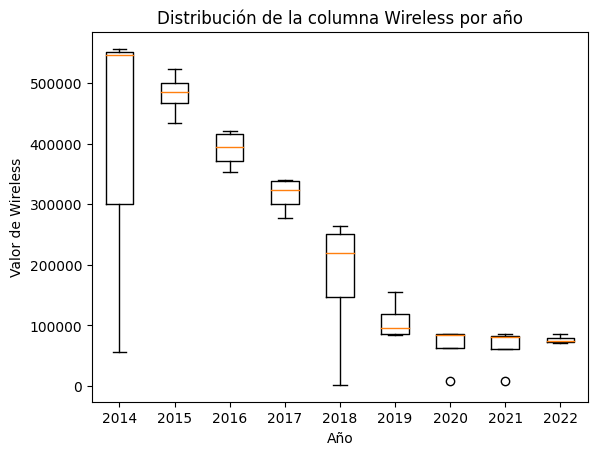

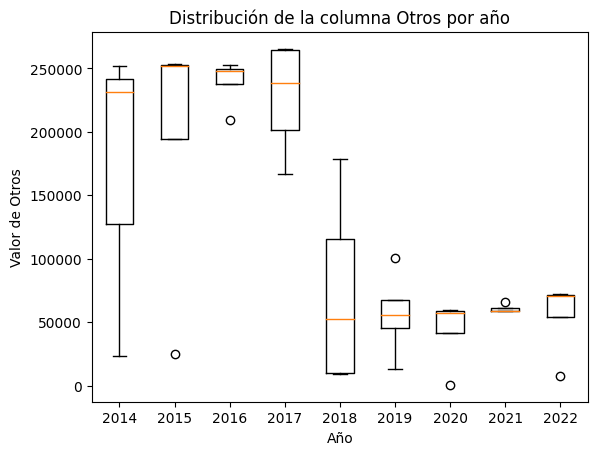

In [115]:
import matplotlib.pyplot as plt

# Obtener las columnas de tecnologías
columnas_tecnologia = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Iterar sobre las columnas de tecnología y generar un gráfico para cada una
for columna in columnas_tecnologia:
    # Obtener los años únicos en orden invertido
    years = reversed(data8['Año'].unique())

    # Crear un boxplot de la columna de tecnología para cada año en orden invertido
    plt.boxplot([data8[data8['Año'] == year][columna] for year in data8['Año'].unique()])

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel(f'Valor de {columna}')
    plt.title(f'Distribución de la columna {columna} por año')

    # Establecer etiquetas en el eje x en orden invertido
    plt.xticks(range(1, len(data8['Año'].unique()) + 1), years)

    # Mostrar el gráfico
    plt.show()

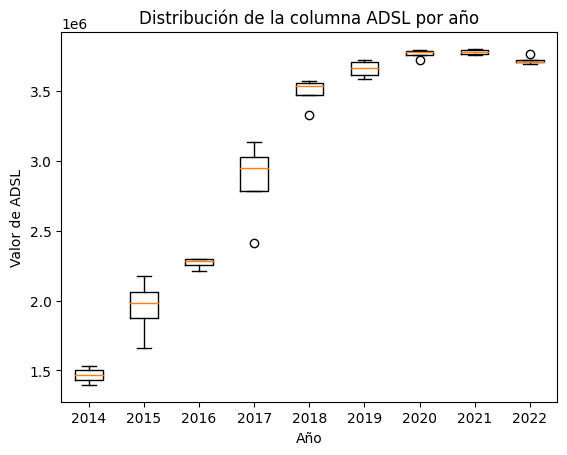

In [108]:
import matplotlib.pyplot as plt

# Obtener los años únicos en orden invertido
years = reversed(data8['Año'].unique())

# Crear un boxplot de la columna 'ADSL' para cada año en orden invertido
plt.boxplot([data8[data8['Año'] == year]['ADSL'] for year in data8['Año'].unique()])

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Valor de ADSL')
plt.title('Distribución de la columna ADSL por año')

# Establecer etiquetas en el eje x en orden invertido
plt.xticks(range(1, len(data8['Año'].unique()) + 1), years)

# Mostrar 
# Mostrar el gráfico
plt.show()

In [100]:
datos_adsl = data8[data8['Año'] == 2021]['Fibra óptica'].sum()
datos_adsl

6473506

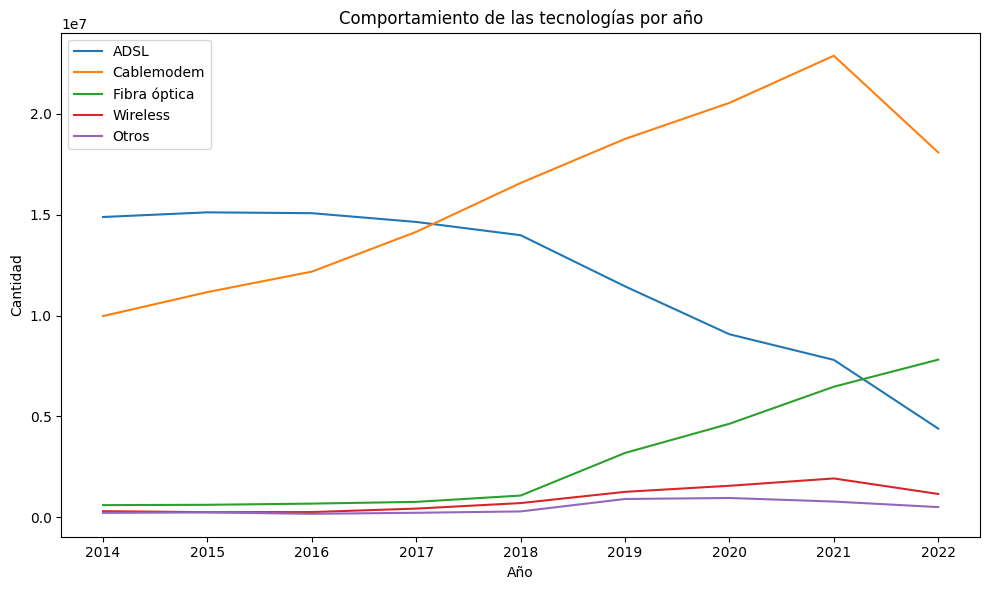

In [73]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los datos de las tecnologías por año
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for tecnologia in tecnologias:
    datos_tecnologia = data8.groupby('Año')[tecnologia].sum()
    ax.plot(datos_tecnologia.index, datos_tecnologia, label=tecnologia)

# Personalizar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Comportamiento de las tecnologías por año')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

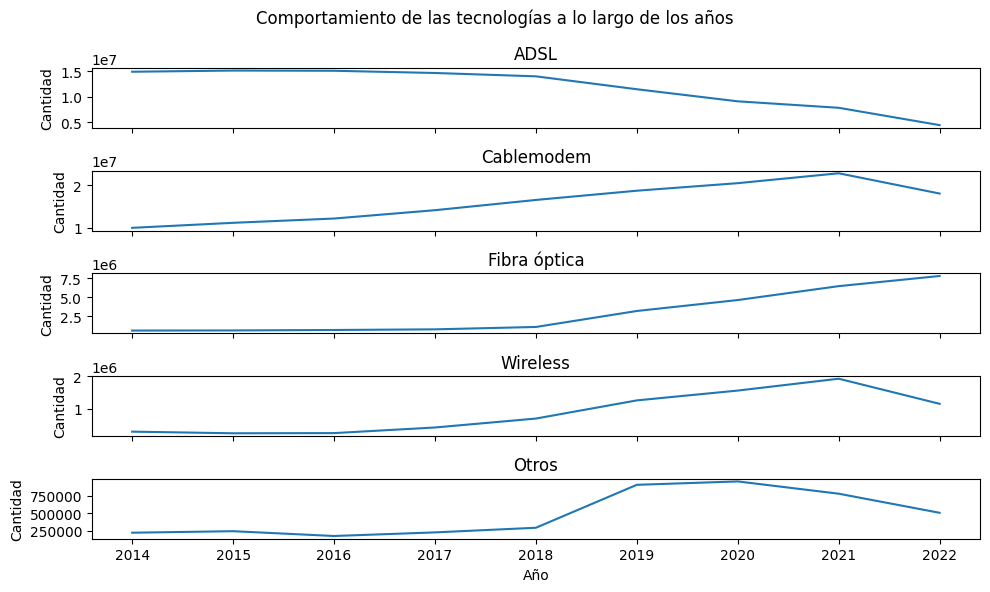

In [79]:
import matplotlib.pyplot as plt

# Definir las tecnologías
technologies = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear una figura y ejes separados para cada tecnología
fig, axes = plt.subplots(len(technologies), 1, figsize=(10, 6), sharex=True)

# Iterar sobre las tecnologías y generar un gráfico separado para cada una
for i, tech in enumerate(technologies):
    # Obtener los datos de la tecnología por año
    tech_data = data8.groupby('Año')[tech].sum()

    # Crear el gráfico de líneas para la tecnología actual en el eje correspondiente
    axes[i].plot(tech_data.index, tech_data)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_title(tech)

# Personalizar la figura
plt.xlabel('Año')
plt.suptitle('Comportamiento de las tecnologías a lo largo de los años')
plt.tight_layout()

# Mostrar la figura con los gráficos
plt.show()

In [27]:
data9 = pd.read_csv('C:\PI_DA\Datasets\Internet_Accesos-por-velocidad_y_prov.csv')

In [28]:
data9.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [29]:
data10 = pd.read_csv('C:\PI_DA\Datasets\Internet_Accesos-por-velocidad.csv')

In [30]:
data10.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN


In [34]:
data11 = pd.read_csv('C:\PI_DA\Datasets\Internet_BAF_x_Prov.csv')

In [35]:
data11.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [36]:
data12 = pd.read_csv('C:\PI_DA\Datasets\Internet_BAF.csv')

In [37]:
data12.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [38]:
data13 = pd.read_csv('C:\PI_DA\Datasets\Internet_Ingresos.csv')

In [39]:
data13.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [40]:
data14 = pd.read_csv('C:\PI_DA\Datasets\Internet_Penetracion_x_hogar.csv')

In [41]:
data14.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [42]:
data15 = pd.read_csv('C:\PI_DA\Datasets\Internet_Penetracion.csv')

In [43]:
data15.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [127]:
data16 = pd.read_csv('C:\PI_DA\Datasets\Listadodelocalidadesconconectividadainternet_2750221689180811605.csv')

In [128]:
data16.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [2]:
import pandas as pd


In [16]:
datacoor = pd.read_excel('C:\PI_DA\Datasets\provincias_localidades_coorde.xlsx')

In [17]:
datacoor.head()

,Nombre,Latitud,Longitud,Municipio,Departamento,Provincia
0,25 De Mayo,-35.43393859,-60.17312095,25 De Mayo,25 De Mayo,Buenos Aires
1,Agustin Mosconi,-35.73921695,-60.55906346,25 De Mayo,25 De Mayo,Buenos Aires
2,Anderson,-35.2813845,-60.2618183,25 De Mayo,25 De Mayo,Buenos Aires
3,Araujo,-35.30833383,-60.3284768,25 De Mayo,25 De Mayo,Buenos Aires
4,Baudrix,-35.2446891,-60.3044141,25 De Mayo,25 De Mayo,Buenos Aires


In [18]:
datacoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521 entries, 0 to 13520
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nombre        13521 non-null  object
 1   Latitud       13521 non-null  object
 2   Longitud      13521 non-null  object
 3   Municipio     13521 non-null  object
 4   Departamento  13521 non-null  object
 5   Provincia     13521 non-null  object
dtypes: object(6)
memory usage: 633.9+ KB


In [19]:
def clean_coordinate(value):
    value = value.replace(',', '.')  # Reemplazar ',' por '.'
    value = value.replace('..', '.')  # Reemplazar '..' por '.'
    return float(value)

In [24]:
datacoor['Nombre'] = datacoor['Nombre'].astype(str)

In [20]:
datacoor['Latitud'] = datacoor['Latitud'].apply(clean_coordinate)
datacoor['Longitud'] = datacoor['Longitud'].apply(clean_coordinate)


In [26]:
import plotly.express as px
import plotly.graph_objects as go


# Crear el mapa centrado en Argentina con el gráfico de densidad
fig = px.density_mapbox(datacoor, lat='Latitud', lon='Longitud', z='Provincia', radius=10,
                        center=dict(lat=-34.61, lon=-58.38), zoom=4,
                        mapbox_style='carto-positron', opacity=0.7)

# Mostrar el mapa
fig.show()


In [1]:
import pandas as pd

In [2]:
datatv1 = pd.read_csv('C:\PI_DA\Datasets\complementario\Television (1).csv')

In [5]:
datatv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              35 non-null     float64
 1   Trimestre                                        35 non-null     float64
 2   Accesos TV por suscripción por cada 100 hab      36 non-null     object 
 3   Accesos TV satelital por cada 100 hab            36 non-null     object 
 4   Accesos TV por suscripción por cada 100 hogares  36 non-null     object 
 5   Accesos TV satelital por cada 100 hogares        36 non-null     object 
dtypes: float64(2), object(4)
memory usage: 1.8+ KB


In [8]:
datatv1.head()


,Año,Trimestre,Accesos TV por suscripción por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,Accesos TV satelital por cada 100 hogares
0,2022.0,3.0,"16,56","4,46","52,97","14,27"
1,2022.0,2.0,"16,55","4,47","53,01","14,31"
2,2022.0,1.0,"16,41","4,45","52,61","14,25"
3,2021.0,4.0,"16,52","4,37","52,99","14,02"
4,2021.0,3.0,"16,73","4,68","53,72","15,03"


In [3]:
datatv2 = pd.read_csv('C:\PI_DA\Datasets\complementario\Television (2).csv')

In [6]:
datatv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         840 non-null    int64 
 1   Trimestre                   840 non-null    int64 
 2   Provincia                   840 non-null    object
 3   Accesos TV por suscripción  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [9]:
datatv2.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción
0,2022,3,Buenos Aires,2.998.021
1,2022,3,Capital Federal,743.338
2,2022,3,Catamarca,52.274
3,2022,3,Chaco,121.771
4,2022,3,Chubut,80.020


In [4]:
datatv3 = pd.read_csv('C:\PI_DA\Datasets\complementario\Television.csv')

In [16]:
datatv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Año                                        35 non-null     int64   
 1   Trimestre                                  35 non-null     category
 2   Ingresos TV por suscripción  (miles de $)  35 non-null     float64 
 3   Ingresos TV satelital (miles de $)         35 non-null     float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 1.2 KB


In [15]:
datatv3.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,52242784.63,27073190.89
1,2022,2,46292673.44,23559484.83
2,2022,1,42093870.19,21268086.24
3,2021,4,38273391.80,18038065.44
4,2021,3,36398025.53,18039519.50


In [13]:
def convertir_moneda(valor):
    valor = valor.replace('$', '')  # Elimina el símbolo $
    valor = valor.replace('.', '')  # Elimina los puntos de los miles
    valor = valor.replace(',', '.')  # Reemplaza la coma decimal por un punto decimal
    return float(valor)  # Convierte el valor a tipo flotante

# Aplica la función a la columna 'columna' en tu DataFrame
#datatv3['Ingresos TV por suscripción  (miles de $)'] = datatv3['Ingresos TV por suscripción  (miles de $)'].apply(convertir_moneda)
datatv3['Ingresos TV satelital (miles de $)'] = datatv3['Ingresos TV satelital (miles de $)'].apply(convertir_moneda)

In [14]:
datatv3['Trimestre'] = datatv3['Trimestre'].astype('category')

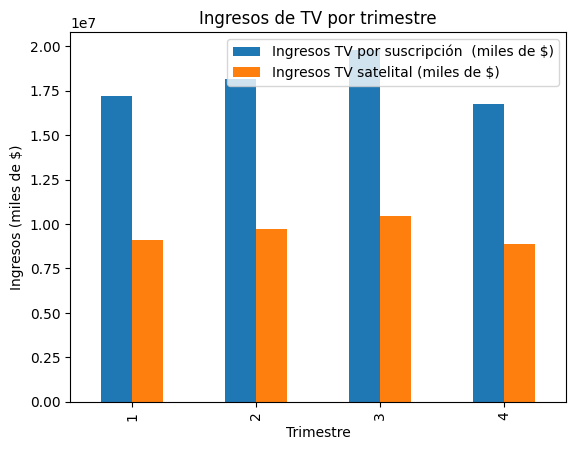

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame con las columnas mencionadas

# Agrupa los datos por trimestre y calcula el promedio de los ingresos para cada trimestre
ingresos_por_trimestre = datatv3.groupby('Trimestre')[['Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)']].mean()

# Crea el gráfico de barras agrupadas
ingresos_por_trimestre.plot.bar()

# Personaliza el gráfico
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de $)')
plt.title('Ingresos de TV por trimestre')

# Muestra el gráfico
plt.show()


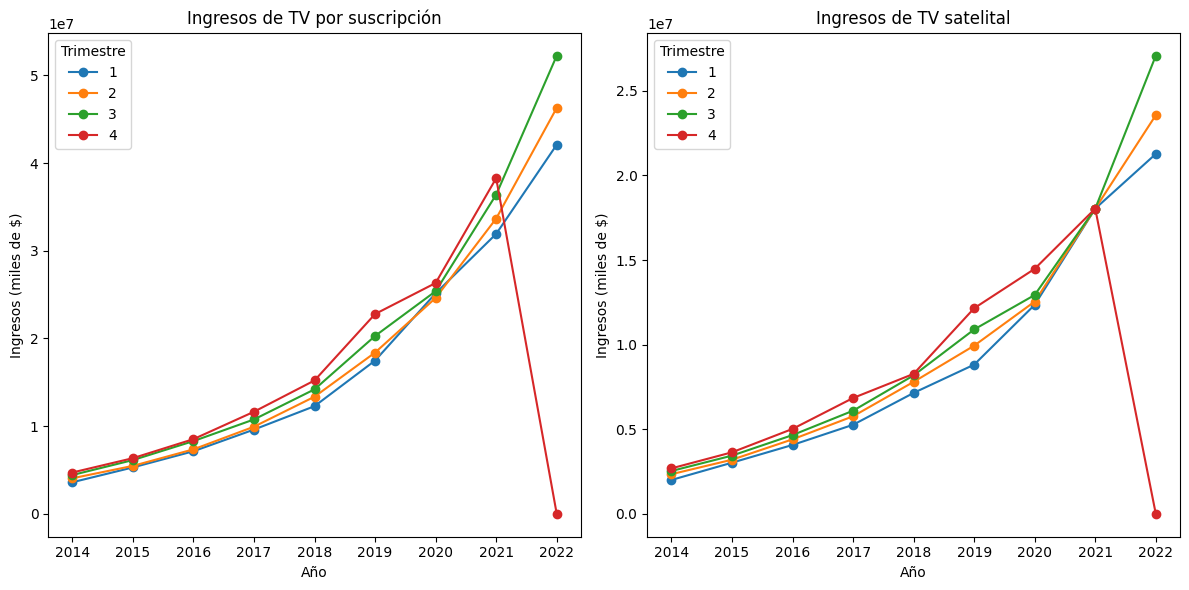

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame con las columnas mencionadas

# Agrega una nueva columna 'Año' que extrae el año de la columna 'Año'
datatv3['Año'] = pd.to_datetime(datatv3['Año'], format='%Y')
datatv3['Año'] = datatv3['Año'].dt.year

# Agrupa los datos por trimestre y año y calcula la suma de los ingresos para cada trimestre y año
ingresos_por_trimestre = datatv3.groupby(['Trimestre', 'Año'])[['Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)']].sum()

# Crea la figura y las subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Dos subtramas lado a lado, ajusta el tamaño según tus necesidades

# Gráfico de líneas para los ingresos de TV por suscripción
ingresos_por_trimestre['Ingresos TV por suscripción  (miles de $)'].unstack(level=0).plot(marker='o', ax=axs[0])
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Ingresos (miles de $)')
axs[0].set_title('Ingresos de TV por suscripción')

# Gráfico de líneas para los ingresos de TV satelital
ingresos_por_trimestre['Ingresos TV satelital (miles de $)'].unstack(level=0).plot(marker='o', ax=axs[1])
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Ingresos (miles de $)')
axs[1].set_title('Ingresos de TV satelital')

# Ajusta los espacios entre subtramas
plt.tight_layout()

# Muestra la figura con las subtramas
plt.show()



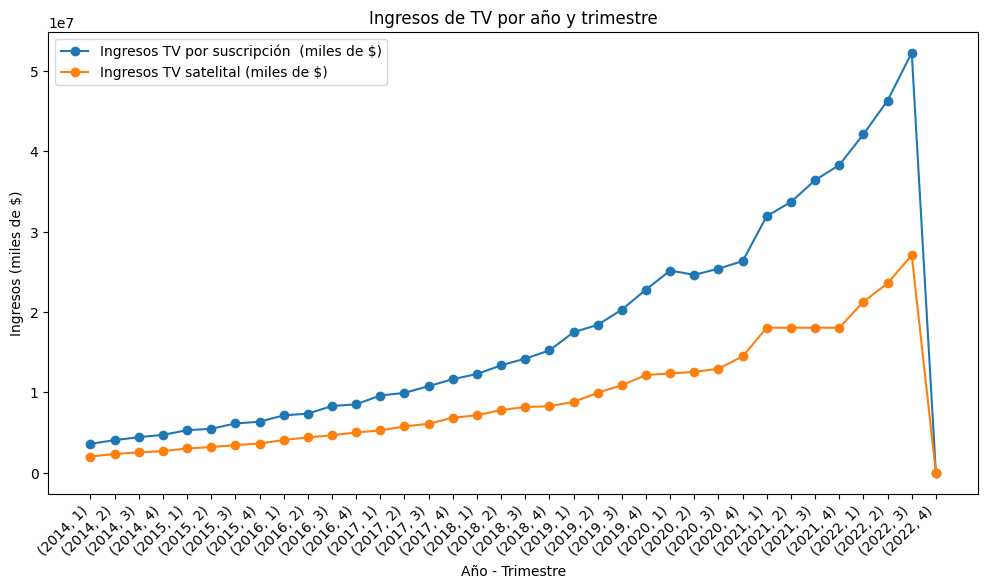

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame con las columnas mencionadas

# Agrega una nueva columna 'Año' que extrae el año de la columna 'Año'
datatv3['Año'] = pd.to_datetime(datatv3['Año'], format='%Y')
datatv3['Año'] = datatv3['Año'].dt.year

# Agrupa los datos por año y trimestre y calcula la suma de los ingresos para cada trimestre y año
ingresos_por_anio = datatv3.groupby(['Año', 'Trimestre'])[['Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)']].sum()

# Reordena el índice para que los trimestres aparezcan en orden
ingresos_por_anio = ingresos_por_anio.reindex(pd.MultiIndex.from_product([ingresos_por_anio.index.levels[0], ingresos_por_anio.index.levels[1]], names=['Año', 'Trimestre']))

# Crea una figura con una subtrama y ajusta el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño según tus necesidades

# Crea el gráfico de líneas
ingresos_por_anio.plot.line(marker='o', ax=ax)

# Personaliza el gráfico
plt.xlabel('Año - Trimestre')
plt.ylabel('Ingresos (miles de $)')
plt.title('Ingresos de TV por año y trimestre')

# Ajusta los ticks del eje x para mostrar más datos
ticks = range(len(ingresos_por_anio.index))
labels = ingresos_por_anio.index.to_flat_index()
plt.xticks(ticks, labels, rotation=45, ha='right')

# Muestra el gráfico
plt.show()


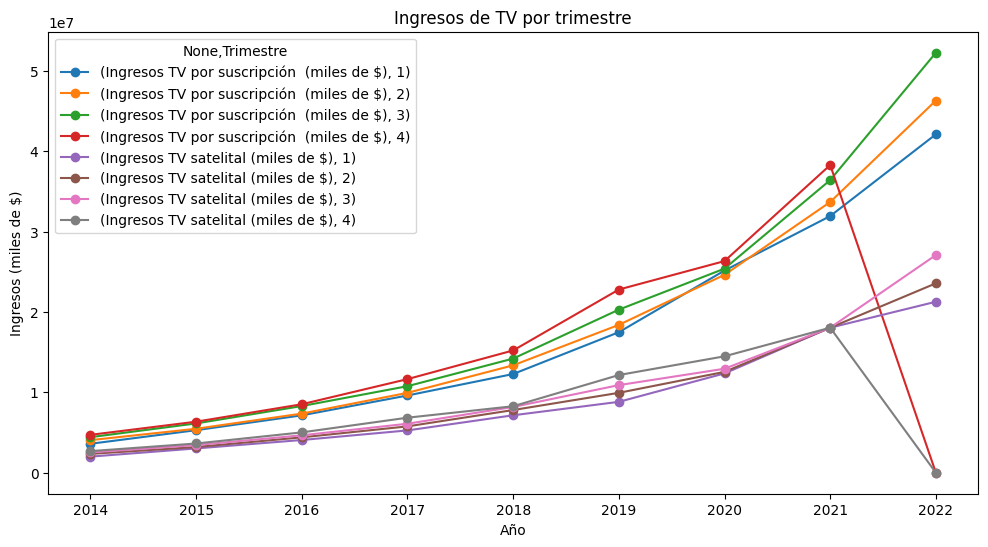

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame con las columnas mencionadas

# Agrega una nueva columna 'Año' que extrae el año de la columna 'Año'
datatv3['Año'] = pd.to_datetime(datatv3['Año'], format='%Y')
datatv3['Año'] = datatv3['Año'].dt.year

# Agrupa los datos por año y trimestre y calcula la suma de los ingresos para cada trimestre y año
ingresos_por_trimestre = datatv3.groupby(['Año', 'Trimestre'])[['Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)']].sum()

# Reordena el índice para que los trimestres aparezcan en orden
ingresos_por_trimestre = ingresos_por_trimestre.reindex(pd.MultiIndex.from_product([ingresos_por_trimestre.index.levels[0], ingresos_por_trimestre.index.levels[1]], names=['Año', 'Trimestre']))

# Crea una figura con una subtrama y ajusta el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño según tus necesidades

# Crea el gráfico de línea
ingresos_por_trimestre.unstack(level='Trimestre').plot(marker='o',ax=ax)

# Personaliza el gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de $)')
plt.title('Ingresos de TV por trimestre')

# Muestra el gráfico
plt.show()


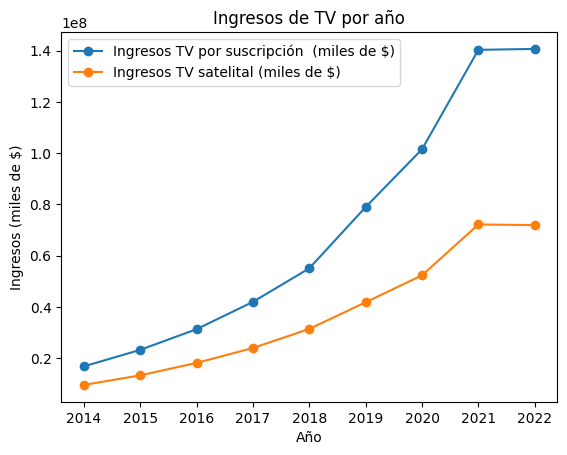

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame con las columnas mencionadas

# Agrega una nueva columna 'Año' que extrae el año de la columna 'Año'
datatv3['Año'] = pd.to_datetime(datatv3['Año'], format='%Y')
datatv3['Año'] = datatv3['Año'].dt.year

# Agrupa los datos por año y calcula la suma de los ingresos para cada año
ingresos_por_anio = datatv3.groupby('Año')[['Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)']].sum()

# Crea el gráfico de línea
ingresos_por_anio.plot.line(marker='o')

# Personaliza el gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de $)')
plt.title('Ingresos de TV por año')

# Muestra el gráfico
plt.show()
